In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#步骤一 数据加载与预处理,查看数据特征，绘制图表
#1)删除多余字段ID，查看样本行列数，最大值最小值等特征描述

data = pd.read_csv('./UCI_Credit_Card.csv')
data.drop(['ID'], inplace=True, axis=1)
print(data)
print(data.shape)
print(data.describe())

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0        20000.0    2          2         1   24      2      2     -1     -1   
1       120000.0    2          2         2   26     -1      2      0      0   
2        90000.0    2          2         2   34      0      0      0      0   
3        50000.0    2          2         1   37      0      0      0      0   
4        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995   220000.0    1          3         1   39      0      0      0      0   
29996   150000.0    1          3         2   43     -1     -1     -1     -1   
29997    30000.0    1          2         2   37      4      3      2     -1   
29998    80000.0    1          3         1   41      1     -1      0      0   
29999    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [45]:
#步骤一 数据加载与预处理,查看数据特征，绘制图表
#2)查看样本中违约数量

next_month = data['default.payment.next.month'].value_counts()
print(next_month)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


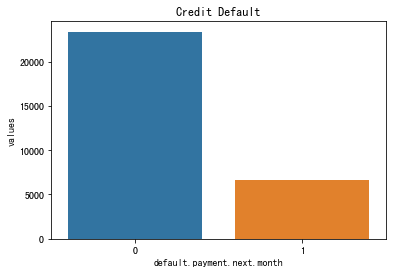

In [46]:
#步骤一 数据加载与预处理,查看数据特征，绘制图表
#3)绘制图表

df = pd.DataFrame({'default.payment.next.month':next_month.index,'values':next_month.values})
plt.title('Credit Default')
sns.barplot (x='default.payment.next.month', y='values',data=df)
plt.show()

In [47]:
#步骤二 准备训练数据集

target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values
print(columns)


['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [49]:
#步骤三 训练并预测违约率
train_x,test_x,train_y,test_y = train_test_split(features,target,test_size=0.3)

#1)构造分类器
classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
]
#2)标注分类器名称
classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier'
]

#3)设置分类器参数
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

#4)对具体的分类器进行GridSearchCV参数调优，最终输出预测结果
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy'):
    gridsearch = GridSearchCV(estimator=pipeline,param_grid=model_param_grid, scoring=score)
    #寻找最优参数 和 最优准确率分数
    search = gridsearch.fit(train_x, train_y)
    print('GridSearchCV最优参数：',search.best_params_)
    print('GridSearchCV最优分数：',search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print('准确率 %0.4lf' %accuracy_score(test_y, predict_y))
    
    response = {}
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y, predict_y)
    return response
    
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')
 


GridSearchCV最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearchCV最优分数： 0.815047619047619
准确率 0.8172
GridSearchCV最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearchCV最优分数： 0.8166666666666667
准确率 0.8207
GridSearchCV最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearchCV最优分数： 0.7952857142857143
准确率 0.8022
GridSearchCV最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearchCV最优分数： 0.8003809523809524
准确率 0.8052
